In [2]:
import os
import glob
import pandas as pd
import numpy as np

# datasetsフォルダ内にあるcsvファイルの一覧を取得
files1 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets2/inside/muscle*.txt")
files2 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets2/outside/muscle*.txt")
files3 = glob.glob("../../../Desktop/GHELIA/myoelectricity/datasets2/fist/muscle*.txt")

/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
f1_np =[]
fa1 = []
for i in range(50):
    f1 = open(files1[i])
    f1_array = f1.read().split()
    f1_np = np.append(f1_np, f1_array)
    for j in range(1000):
        a1 = f1_np[j].split(",")
        fa1 = np.append(fa1, a1)
fr1 = []
for i in range(fa1.shape[0]):
    fr1 = np.append(fr1,float(fa1[i]))
inside = fr1.reshape(50,1000,2)

In [24]:
f2_np =[]
fa2 = []
for i in range(50):
    f2 = open(files2[i])
    f2_array = f2.read().split()
    f2_np = np.append(f2_np, f2_array)
    for j in range(1000):
        a2 = f2_np[j].split(",")
        fa2 = np.append(fa2, a2)
fr2 = []
for i in range(fa2.shape[0]):
    fr2 = np.append(fr2,float(fa2[i]))
outside = fr2.reshape(50,1000,2)

In [5]:
f3_np =[]
fa3 = []
for i in range(50):
    f3 = open(files3[i])
    f3_array = f3.read().split()
    f3_np = np.append(f3_np, f3_array)
    for j in range(1000):
        a3 = f3_np[j].split(",")
        fa3 = np.append(fa3, a3)
fr3 = []
for i in range(fa3.shape[0]):
    fr3 = np.append(fr3,float(fa3[i]))
fist = fr3.reshape(50,1000,2)

In [6]:
x_train = []
for i in range(0,35):
    x_train = np.append(x_train, inside[i])
    x_train = np.append(x_train, outside[i])
    x_train = np.append(x_train, fist[i])
x_test = []
for j in range(35,50):
    x_test = np.append(x_test, inside[j])
    x_test = np.append(x_test, outside[j])
    x_test = np.append(x_test, fist[j])

In [7]:
x_train = x_train.reshape(105,1000,2)
x_test = x_test.reshape(45,1000,2)
# y_train = np.array([0,1,2]).repeat(35)
# y_test = np.array([0,1,2]).repeat(15)
y_train = np.array([0,1,2]*35)
y_test = np.array([0,1,2]*15)

In [8]:
y_train

array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2])

In [9]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

In [10]:
X_train = np.zeros((105,1000))
for i in range(105):
    for j in range(1000):
        X_train_pre = x_train[i][j][1]
#         print(X_train_pre)
        X_train[i][j] = X_train_pre

X_test = np.zeros((45,1000))
for i in range(45):
    for j in range(1000):
        X_test_pre = x_test[i][j][1]
#         print(X_train_pre)
        X_test[i][j] = X_test_pre

In [11]:
X_train[0].shape

(1000,)

In [12]:
def wave_plot_fft(f):
    N =  1000
    dt = 0.01
    freq = np.linspace(0, 1.0/dt, N)
    yf = f/(N/2)
    
    plt.figure(2)
    plt.plot(freq, np.abs(yf))
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    plt.tight_layout()
    plt.show()

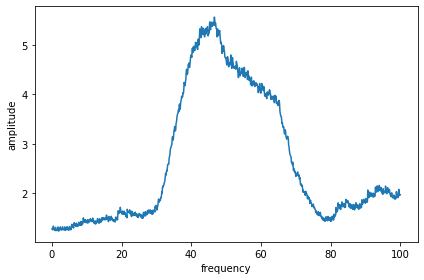

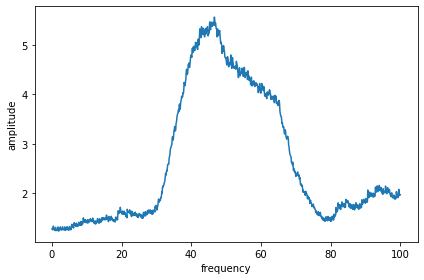

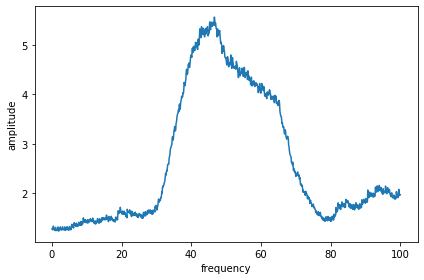

In [13]:
wave_plot_fft(X_train[0])
wave_plot_fft(X_train[3])
wave_plot_fft(X_train[6])

In [14]:
x_train_pre = []
for i in range(105):
    x_train_pre = np.append(x_train_pre,fft(X_train[i]))

X_train_fft = x_train_pre.reshape(105,1000)
x_test_pre = []
for i in range(45):
    x_test_pre = np.append(x_test_pre,fft(X_test[i]))

X_test_fft = x_test_pre.reshape(45,1000)

## Convolution1D

In [15]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import BatchNormalization, Add
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.pooling import MaxPool1D
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/m

In [16]:
batch_size = 64
num_classes = 3
epochs = 50

In [17]:
X_train_tf = np.reshape(X_train_fft, (X_train_fft.shape[0], -1, 1))
X_test_tf = np.reshape(X_test_fft, (X_test_fft.shape[0], -1, 1))

In [18]:
y_train_tf = keras.utils.to_categorical(y_train, num_classes)
y_test_tf = keras.utils.to_categorical(y_test, num_classes)

In [19]:
model = Sequential()

model.add(Conv1D(filters=128, input_shape=(X_train_fft.shape[1],1), kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Conv1D(filters=128, kernel_size=2, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size=2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop()
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

W1016 14:46:08.869327 4728231360 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1016 14:46:08.888673 4728231360 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1016 14:46:08.893790 4728231360 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1016 14:46:08.969884 4728231360 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is d

In [20]:
es = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

In [21]:
history_fft = model.fit(X_train_tf, y_train_tf,
                       batch_size = batch_size,
                       epochs = epochs,
                       verbose =1,
                       validation_data = (X_test_tf, y_test_tf),
                       callbacks = [es])

W1016 14:46:09.294365 4728231360 deprecation.py:323] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 105 samples, validate on 45 samples
Epoch 1/50


/Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


105/105 [==============================] - 2s 16ms/step - loss: 3.9013 - acc: 0.4000 - val_loss: 0.4207 - val_acc: 0.6667
Epoch 2/50
105/105 [==============================] - 1s 6ms/step - loss: 3.3747 - acc: 0.5524 - val_loss: 5.3757 - val_acc: 0.6667
Epoch 3/50
105/105 [==============================] - 1s 6ms/step - loss: 5.4522 - acc: 0.6381 - val_loss: 6.6168 - val_acc: 0.3333
Epoch 4/50
105/105 [==============================] - 1s 6ms/step - loss: 6.9178 - acc: 0.3619 - val_loss: 5.3734 - val_acc: 0.6667
Epoch 5/50
105/105 [==============================] - 1s 6ms/step - loss: 5.3745 - acc: 0.6667 - val_loss: 5.3729 - val_acc: 0.6667
Epoch 6/50
105/105 [==============================] - 1s 6ms/step - loss: 5.3732 - acc: 0.6667 - val_loss: 5.3728 - val_acc: 0.6667


In [22]:
score = model.evaluate(X_test_tf, y_test_tf, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 5.372777366638184
Test accuracy: 0.6666666719648573


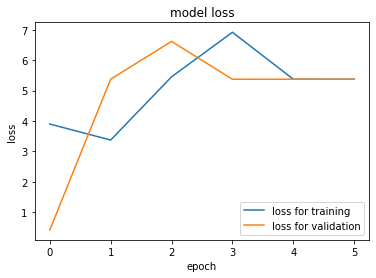

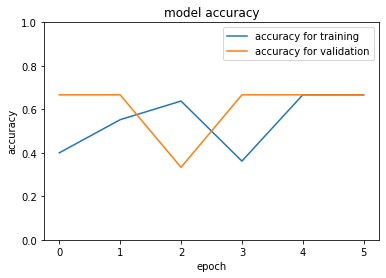

In [23]:
def plot_history_lost(history):
    plt.plot(history.history['loss'], label='loss for training')
    plt.plot(history.history['val_loss'], label='loss for validation')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='best')
    plt.show()
    
def plot_history_acc(history):
    plt.plot(history.history['acc'], label='accuracy for training')
    plt.plot(history.history['val_acc'], label='accuracy for validation')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0,1])
    plt.show()
    
plot_history_lost(history_fft)
plot_history_acc(history_fft)

In [26]:
model.save('myoelectricity.h5')

In [19]:
from keras.models import load_model
model = load_model('myoelectricity.h5')

W1010 16:00:48.007034 4461315520 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1010 16:00:48.027904 4461315520 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1010 16:00:48.116855 4461315520 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1010 16:00:48.117893 4461315520 deprecation_wrapper.py:119] From /Users/megu.kato/.pyenv/versions/3.6.1/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is 

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1000, 128)         384       
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000, 128)         512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 128)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 500, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 128)          32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 500, 128)          512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 250, 128)          0         
__________

In [25]:
import random
index = random.randint(0,44)
sample = X_test_fft[index]
sample = sample.reshape(1,1000,1)
predict = model.predict(sample)

y_pred = np.argmax(predict, axis=1)
print('predict: ', y_pred[0])
print('answer: ', y_test[index])

predict:  2
answer:  2


In [26]:
label = {0:"inside",1:"outside",2:"fist"}
print('predict:', label[y_pred[0]])
print('answer:', label[y_test[index]])

predict: fist
answer: fist
